Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **03Feb2019**

# 02b. Nuclear Data and Data Processing: Cumulative Fission Product Yields 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\abs}[1]{\left\lvert{#1}\right\rvert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Cumulative (Decayed) fission fragment yield (A,Z)](#cffyaz)
* [Half-life time of nuclides data](#halflife)
* [Cumulative fission products half-life times](#cfphalflife)
---

## Objectives<a id="obj"></a>
+ Demonstrate how to obtain traceable nuclear data and have them available through the notebook for analysis and problem solving.
+ Demonstrate how to obtain average values for various quantities related to fission products yield.

## Introduction<a id="intro"></a>

Refer to Notebook 02.

## Cumulative (decayed) fission fragment yield (A,Z)<a id="cffyaz"></a>

Acquiring the data:

+ Using the [ENDF](https://www.nndc.bnl.gov/exfor/endf00.jsp) help tab, look for an existing example. In this case follow the `Example 9: 235U, individual and cumulative fission product yields, US library, numerical values`. 
+ Use the *extended retrieval tab* and provide the input: `Target=u-235, Sub-library (Projectile) = *fpy* and Library=ENDF/B-VII.0`. 
+ In the new window, select the library and click on `FPY(A)`. 
+ Select the *independent* (prompt) thermal neutron fission product yield data `FPYC,U-235,ENDF/B-VIII.0,Ei=0.0253eV` and `Repaint` the plot.
+ Click on `FY(Z,A) matrix  is [here]` at the bottom of the window.
+ Reset the energy level for plotting and `Repaint` the plot.
+ Use the browser save option to create a file with the raw data `u-235-cfpy-AZ-thermal.dat`.
+ Unfortunately this data file needs to be edited before it can be imported.

**Note:**

    The cumulative yields include expected amount of products from parent nuclides by (almost $\beta$) decay, 
    and the total number is larger than 2. In the case of U-235 fission yields by thermal neutron incidence 
    in JENDL 4.0 Fission Yield Sub-library, total independent yield is about 2.0 and total cumulative yield 
    is 8.4.

Only decay reactions are taken into account, no additional neutron reaction with fission products or target nucleus is considered.

In [1]:
'''View the raw data'''
!head -n 8 data/u-235-cfpy-AZ-thermal.dat
print('...')
!tail -n 1 data/u-235-cfpy-AZ-thermal.dat

#ZVView-data-copy: 18-Feb-2019 01:24:17
------------------------------------------------------------------------
#
#FPYC,U-235,ENDF/B-VIII.0,Ei=0.0253eV
Z(107x50): Z_i,j = Cor(?_Xi ,?_Yj )*100
  	X(NO-DIM)
Y(NO-DIM) 	66	67	68	69	70	71	72	73	74	75	76	77	78	79	80	81	82 83	84	85	86	87	88	89	90	91	92	93	94	95	96	97	98	99	100	101	102	103 104	105	106	107	108	109	110	111	112	113	114	115	116	117	118	119	120 121	122	123	124	125	126	127	128	129	130	131	132	133	134	135	136	137 138	139	140	141	142	143	144	145	146	147	148	149	150	151	152	153	154 155	156	157	158	159	160	161	162	163	164	165	166	167	168	169	170	171	172	/j/
23 2.05032e-17	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1
...
72 	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0 

In [2]:
'''Function to read the blank-spaced column data into a Pandas data frame (table)'''

def read_table(file_name):
    '''
    Read table data into a `pandas` data frame (table).  
    
    Parameters
    ----------
    file_name: str, required
        File name and its path relative to this notebook.
    
    Returns
    -------
    df: pandas.df
        `Pandas` data frame (table).

    Examples
    --------
    '''
    import pandas as pd
    
    df = pd.read_csv( file_name,  
                      skiprows=6,
                      delim_whitespace=True)
    
# to avoid frustrations, set explicitly the data types of each column
    for c in df.columns: 
        if c == 'Y(NO-DIM)':
            continue
        df = df.astype({c:float},copy=False)

    #print(df.dtypes)
    return df

In [3]:
'''Read data'''

cfpy_az_df = read_table('data/u-235-cfpy-AZ-thermal.dat')

In [4]:
'''Function for creating a FP yield(A,Z) list container'''

def get_fpy_az( df ):
    '''
    Create a list of named tuple nuclides
    Parameters
    ----------
    df: pandas data frame, required
        Table of data for nuclides.
    
    Returns
    -------
    nuclides: list(namedtuple)
        List of namedtuples. Names: name, element_name, Z, A, yield_percent.

    Examples
    --------
    '''
    
    nuclides = list()

    # design a container data structure
    from collections import namedtuple
    FPY = namedtuple('FPY', ['name','element_name','Z','A','yield_percent'])

    import pandas as pd

    # Use the Mendeleev python package (periodic table of elements)
    from mendeleev import element
    
    total_yield = 0.0 # sum total yield
    for row in df.itertuples(index=False):
        z = row[0]
        for j in range(1,len(row)-1):
            if row[j] < 1.e-10: # this will eliminate many zeros
                continue
            a_str = df.columns[j] # index column is not part of the columns
            symbol = element(z).symbol
            name = name=symbol+'-'+a_str
            element_name = element(z).name
            yield_value = row[j]
            total_yield += yield_value
            nuc = FPY( name=name, element_name=element_name, Z=z, A=int(a_str), yield_percent=yield_value )
        
            nuclides.append(nuc)
            
    print('Sum of yield values in data file = ',round(total_yield,2))
    return nuclides

In [5]:
'''Create the FP yield(A,Z) list container'''

cfpy_az = get_fpy_az( cfpy_az_df )
print('Sum of yield values in dictionary container = ',round(sum([fp.yield_percent for fp in cfpy_az]),2))
print('# of FP nuclides = ', len(cfpy_az))

Sum of yield values in data file =  841.41
Sum of yield values in dictionary container =  841.41
# of FP nuclides =  796


In [ ]:
'''Function to plot a 3-D surface plot or a 2D surface plot'''
# to do

In [ ]:
'''Plot FP yield on the A,Z plane'''
# to do

In [6]:
'''Total sum of independent FP yield per 100 fissions'''

print('Total sum = ',round(sum([fpy.yield_percent for fpy in cfpy_az]),1))

Total sum =  841.4


In [9]:
'''Min and Max mass number A'''

print('Min A = ',min([fpy.A for fpy in cfpy_az]))
print('Max A = ',max([fpy.A for fpy in cfpy_az]))

Min A =  66
Max A =  172


In [24]:
'''Plot function for nuclides half-life'''

def plot_nuclides(fpy):
    
    from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
    (fig, ax) = plt.subplots(figsize=(18,7))

    ax.plot(range(len(fpy)), [nc.yield_percent for nc in fpy], 
            '-.',color='black', marker='o',markersize=10)
    
    ax.set_xlabel('Nuclide',fontsize=18)
    ax.set_ylabel(r'Yield [%]',fontsize=18)
    
    plt.xticks(range(0,len(fpy),2),[nc.name for nc in fpy][::2],rotation=70,fontsize=12)

    ax.set_xlim((-1,len(fpy)))
    
    # create a twin y axis to reconfigure the top x axis
    ay1 = ax.twiny()
    ay1.set_xlim(ax.get_xlim())
    #ay1.xaxis.tick_top()
    ay1.set_xticks([])
    ay1.set_xticks(range(1,len(fpy),2),[nc.name for nc in fpy][1::2])
    ay1.set_xticklabels([nc.name for nc in fpy][1::2],minor=True,fontsize=12,rotation=70)

    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.title('Cumulative (Decayed) Fission Products (>1% Yield)',fontsize=22)
    ax.grid(True)
    #plt.yscale('log')
    plt.show()

    return

# of FP nuclides =  178


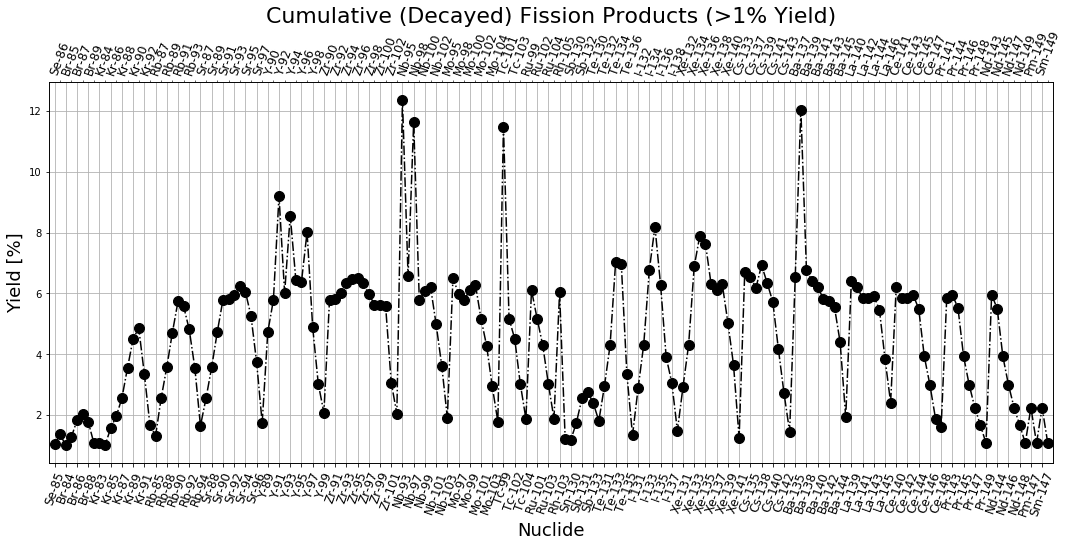

In [25]:
'''Plot FP nuclides with 1% or more fission yield'''

fp_1_percent = list()
for fp in cfpy_az:
    if fp.yield_percent >= 1.0:
        fp_1_percent.append(fp)
        
print('# of FP nuclides = ', len(fp_1_percent))

plot_nuclides(fp_1_percent)

## Nuclide half-life times<a id="halflife"></a>
Collect the half-lives of all nuclides known in a certain range; see next.
Using the [NNDC Nuclides Wallet Cards Search](https://www.nndc.bnl.gov/nudat2/indx_sigma.jsp), 
+ set the `A range` to min. A to max. A
+ enable `T1/2(level) condition` and set half-life range from 0 to 50 My
+ set `Ordering` to `Formatted File`
+ set `Uncertainties` to `Standard Style`
+ click on the `Search` button
+ wait for the results window to appear 
+ use your browser's save page as to save the data to a text file
+ rename the file to `nuclides-half-lives.dat`
+ unfortunately this file requires some clean-up including avoiding repeated values.
+ there is a clean version of this data file in this course repository `data/` directory.

In [11]:
'''View head and tail of the raw data'''

!head -n 4 data/nuclides-half-lives.dat
print('')
!tail -n 4 data/nuclides-half-lives.dat

A  	Element	Z  	N  	T1/2-(seconds)           
66 	V      	23 	43 	3.6e-7                   
66 	V      	23 	43 	3.6e-7                   
66 	V      	23 	43 	3.6e-7                   

172	Au     	79 	93 	0.0077                   
172	Au     	79 	93 	0.0077                   
171	Hg     	80 	91 	5.9e-5                   
172	Hg     	80 	92 	2.31e-4                  


In [12]:
'''Function to read the blank-spaced column data into a Pandas data frame (table)'''

def read_table(file_name):
    '''
    Read table data into a `pandas` data frame (table).  
    
    Parameters
    ----------
    file_name: str, required
        File name and its path relative to this notebook.
    
    Returns
    -------
    df: pandas.df
        `Pandas` data frame (table).

    Examples
    --------
    '''
    import pandas as pd

    # read the data into a data frame (or table)   
    df = pd.read_csv(file_name, delim_whitespace=True)
    
    # to avoid frustrations, set explicitly the data types of each column
    df = df.astype({'A':int,'Element':str,'Z':int,'N':int,'T1/2-(seconds)':float},copy=False)
    print(df.dtypes)

    return df

In [13]:
'''Read data and verify data types'''

df = read_table('data/nuclides-half-lives.dat')

A                   int64
Element            object
Z                   int64
N                   int64
T1/2-(seconds)    float64
dtype: object


In [14]:
'''Function for creating a nuclide container'''

def get_nuclides( df ):
    '''
    Create a dictionary of nuclide name key and named tuple value
    Parameters
    ----------
    df: pandas data frame, required
        Table of data for nuclides.
    
    Returns
    -------
    nuclides: dict(name:namedtuple)
        Dictionary of name key and namedtuple values. Tuple names: element_name, symbol, Z, A, radius, unc.

    Examples
    --------
    '''
    
    nuclides = dict()

    # design a container data structure
    from collections import namedtuple
    Nuclide = namedtuple('Nuclide', ['element_name','symbol','Z','A','half_life'])

    # fill in the list of containers
    misses = 0 # counter of nuclides without radius data
    a_max = 0 # maximum A number with radius data present
    z_max = 0 # maximum Z number with radius data present
    t_max = 0

    import pandas as pd
    
    # Use the Mendeleev python package (periodic table of elements)
    from mendeleev import element
    
    # if df has duplicates, this loop will take care of it
    for row in df.itertuples(index=False):

        a = row[0]
        symbol = row[1]
        z = row[2]
        t = row[4]
        if pd.isnull(t): # missing half-life
            misses += 1
            continue
        if t/3600/24/365 > 50e+6: # remove anything with more than 50 My
            continue

        a_max = max(a,a_max)
        z_max = max(z,z_max)
        
        name = symbol+'-'+str(a)
        t_max = max(t,t_max)
        nuc = Nuclide( element_name=element(z).name, symbol=symbol, Z=z, A=a, half_life=t )
        
        nuclides[name]=nuc

    print('Number of nuclides with    t_1/2 data = ',len(nuclides))
    print('Number of nuclides without t_1/2 data = ',misses)
    print('')
    print('Max Z number with t_1/2 data = ',z_max)
    print('Max A number with t_1/2 data = ',a_max)
    print('t_1/2 [Ma] max = ',t_max/3600/24/365/1000000)
    
    return nuclides

In [15]:
'''Create nuclides dictionary from data frame'''

nuclides = get_nuclides( df )

Number of nuclides with    t_1/2 data =  1464
Number of nuclides without t_1/2 data =  0

Max Z number with t_1/2 data =  80
Max A number with t_1/2 data =  172
t_1/2 [Ma] max =  34.72222222222222


In [16]:
'''Plot function for nuclides half-life'''

def plot_nuclides(nuclides):
    
    from matplotlib import pyplot as plt # import the pyplot function of the matplotlib package
    (fig, ax) = plt.subplots(figsize=(18,7))

    ax.plot([nc.Z for nc in nuclides.values()], [nc.half_life/3600/24/365 for nc in nuclides.values()], 
            ' ',color='black', marker='x',markersize=10)
    
    #plt.xticks(range(0,len(nuclides),20),[nc.symbol for nc in nuclides.values()][::20],rotation=0,fontsize=12)
    min_z = min([nc.Z for nc in nuclides.values()])
    max_z = max([nc.Z for nc in nuclides.values()])

    ax.xaxis.set_ticks(range(min_z, max_z+1,2))
    ax.set_xlim((min_z-1,max_z+1))

    plt.xlabel(r'Nuclide Z Number',fontsize=18)
    plt.ylabel(r'$T_{1/2} [a]$',fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=16)
    
    # create a twin y axis to reconfigure the top x axis
    ay1 = ax.twiny()
    ay1.set_xlim(ax.get_xlim())
    #ay1.xaxis.tick_top()
    ay1.set_xticks([])
    from mendeleev import element
    #ay1.set_xticks(range(0,len(atoms),2),[atm.symbol for atm in atoms][::2],rotation=0,fontsize=12)
    ay1.set_xticks(range(min_z,max_z+1), [element(z).symbol for z in range(min_z,max_z+1)])
    ay1.set_xticklabels([element(z).symbol for z in range(min_z,max_z+1)],minor=True,fontsize=12)

    min_a = min([nc.A for nc in nuclides.values()])
    max_a = max([nc.A for nc in nuclides.values()])
    
    plt.title(r'%i Nuclides: $%i \leq A \leq %i$ '%(len(nuclides),min_a,max_a),fontsize=22)
    ax.grid(True)
    plt.yscale('log')
    plt.show()

    return

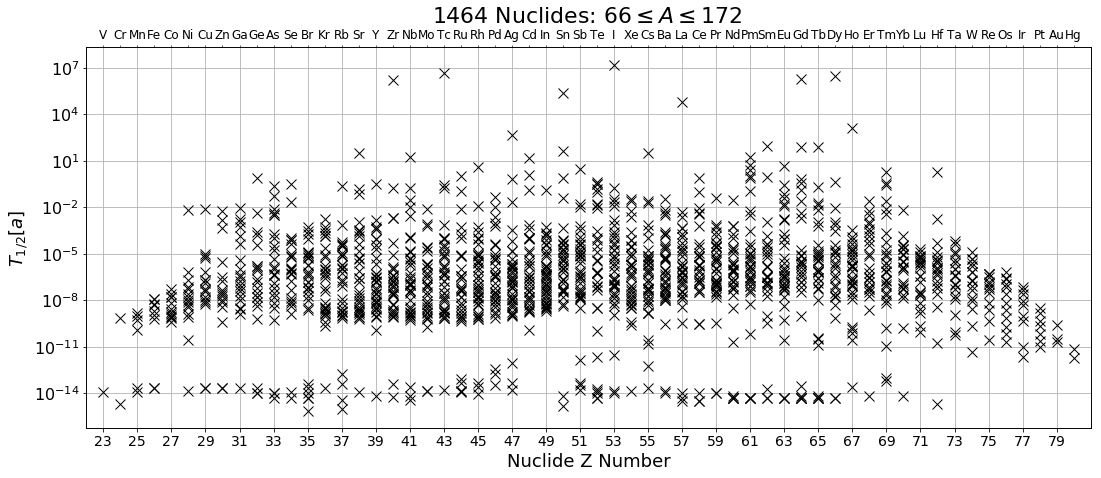

In [18]:
'''Plot half-life of nuclides'''

plot_nuclides(nuclides)

## Cumulative fission products half-life times<a id="cfphalflife"></a>

For those with 1% yield or more.

In [26]:
'''Function to compute half-life times of given nuclides'''

def half_life_times(fp_list, nuclides_data):

    half_life_1_10       = set()
    half_life_10_100     = set()
    half_life_100_1000   = set()
    half_life_1000_1M    = set()
    half_life_1M_10M     = set()
    half_life_10M_50M    = set()
    half_life_50M_infty  = set()
    
    for fp in fp_list:
        name = fp.name 
        if name in nuclides.keys():
            nc    = nuclides[name]
            element_name = nc.element_name
            h_f_y = nc.half_life/3600/24/365
        else:
            #print('missing nuclide half-life...')
            #print('Cumulative FP nuclide: ',nc)
            #print('assuming half-life greater than 10 My')
            #print('continuing...')
            element_name = fp.element_name
            h_f_y = 50e+6 + 1/365       
    
        save = (name,element_name)
        if h_f_y >= 1 and h_f_y < 10:
            half_life_1_10.add(save)
        elif h_f_y >= 10 and h_f_y < 100:
            half_life_10_100.add(save)
        elif h_f_y >= 100 and h_f_y < 1000:
            half_life_100_1000.add(save)
        elif h_f_y >= 1000 and h_f_y < 1e+6:
            half_life_1000_1M.add(save)
        elif h_f_y >= 1e+6 and h_f_y < 10e+6:
            half_life_1M_10M.add(save)
        elif h_f_y >= 10e+6 and h_f_y < 50e+6:
            half_life_10M_50M.add(save)
        else:
            half_life_50M_infty.add(save)
            
    print('1   to 10  years = ',half_life_1_10)
    print('10  to 100 years = ',half_life_10_100)
    print('100 to 1k  years = ',half_life_100_1000)
    print('1k  to 1M  years = ',half_life_1000_1M)
    print('1M  to 10M years = ',half_life_1M_10M)
    print('10M to 50M years = ',half_life_10M_50M)
    #print('50M to --> years = ',half_life_50M_infty)
    
    return

In [27]:
'''Compute half-life times of cumulative FP with >1% yield'''

print('total # of FP nuclides = ', len(fp_1_percent))
print('')
half_life_times(fp_1_percent,nuclides)

total # of FP nuclides =  178

1   to 10  years =  {('Pm-147', 'Promethium')}
10  to 100 years =  {('Sr-90', 'Strontium'), ('Nb-93', 'Niobium'), ('Cs-137', 'Cesium')}
100 to 1k  years =  set()
1k  to 1M  years =  set()
1M  to 10M years =  {('Zr-93', 'Zirconium')}
10M to 50M years =  set()


In [21]:
'''Compute half-life times of cumulative FP all yields'''

print('total # of FP nuclides = ', len(cfpy_az))
print('')
half_life_times(cfpy_az,nuclides)

total # of FP nuclides =  796

1   to 10  years =  {('Tm-171', 'Thulium'), ('Rh-102', 'Rhodium'), ('Pm-147', 'Promethium'), ('Eu-155', 'Europium'), ('Pm-146', 'Promethium'), ('Sb-125', 'Antimony'), ('Ru-106', 'Ruthenium')}
10  to 100 years =  {('Sm-151', 'Samarium'), ('Cs-137', 'Cesium'), ('Cd-113', 'Cadmium'), ('Sn-121', 'Tin'), ('Nb-93', 'Niobium'), ('Sr-90', 'Strontium')}
100 to 1k  years =  set()
1k  to 1M  years =  {('Ho-166', 'Holmium'), ('Sn-126', 'Tin'), ('La-137', 'Lanthanum')}
1M  to 10M years =  {('Tc-98', 'Technetium'), ('Zr-93', 'Zirconium')}
10M to 50M years =  {('I-129', 'Iodine')}


In [28]:
'''Compute half-life times of cumulative FP with >0.1% yield'''

fp_0dot1_percent = list()
for fp in cfpy_az:
    if fp.yield_percent >= 0.1:
        fp_0dot1_percent.append(fp)
        
print('total # of FP nuclides = ', len(fp_0dot1_percent))
print('')
half_life_times(fp_0dot1_percent,nuclides)

total # of FP nuclides =  273

1   to 10  years =  {('Pm-147', 'Promethium'), ('Ru-106', 'Ruthenium')}
10  to 100 years =  {('Sr-90', 'Strontium'), ('Sm-151', 'Samarium'), ('Nb-93', 'Niobium'), ('Cs-137', 'Cesium')}
100 to 1k  years =  set()
1k  to 1M  years =  set()
1M  to 10M years =  {('Zr-93', 'Zirconium')}
10M to 50M years =  {('I-129', 'Iodine')}
